# Concrete Compressive Strength.

Compressive strength or compression strength is the capacity of a material or structure to withstand loads tending to reduce size, as opposed to tensile strength, which withstands loads tending to elongate.

Compressive strength is one of the most important engineering properties of concrete. It is a standard industrial practice that the concrete is classified based on grades. This grade is nothing but the Compressive Strength of the concrete cube or cylinder. Cube or Cylinder samples are usually tested under a compression testing machine to obtain the compressive strength of concrete. The test requisites differ country to country based on the design code.

Here is your Required [Data ](https://drive.google.com/file/d/1Csmy8fz4BDM70wD07XJYKPqOr8BAPfzE/view?usp=sharing)
# **Good Luck**

# 1. Loading Data

In [1]:
import sys
sys.path.insert(0, 'F:\GIT\AI-Course-Python\AI-Python\PythonEnv1\packages')
from MLPckg import MLClass as ml

In [86]:
pathOfData = 'F:\GIT\AI-Course-Python\AI-Python\PythonEnv1\ML\data'
fileDataName = 'Concrete_Data.xls'

df= ml.readDataPandas(pathOfData,fileDataName)
df.columns = ['Cement','Blast','FlyAsh','Water','Superplasticizer','Coarse','FineAgg','Age','ConcreteStength']
df.describe()

,Cement,Blast,FlyAsh,Water,Superplasticizer,Coarse,FineAgg,Age,ConcreteStength
count,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000
mean,281.185326,73.869631,54.163703,181.547862,6.200782,973.023955,773.590622,45.679300,35.821156
std,104.556047,86.317066,64.023167,21.357695,5.975928,77.718027,80.213528,63.198226,16.713463
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.000000,0.000000,0.000000,164.900000,0.000000,932.000000,730.400000,7.000000,23.696601
50%,273.000000,22.000000,0.000000,185.000000,6.350000,968.000000,779.700000,28.000000,34.487590
75%,350.000000,143.000000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.201787
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


# 2. Data Pre-processing

## 2.1 Outliers Handling

***Univariants***

In [51]:
df1 = ml.ol_uniIQR(df)

***multivariants***

In [52]:
df2 = ml.ol_zScore(df)

In [53]:
df3 = ml.ol_meanStd(df)

In [87]:
df4 = ml.ol_multiIQR(df)

## 2.2 Features Selection

In [88]:
X =df4.iloc[:,:-1]
y=df4.iloc[:,-1]
features_matrix= X.values
label=y.values

***1- Embedded Method (Lasso Regularization)***

Best alpha using built-in LassoCV: 3.488843
Best score using built-in LassoCV: 0.767980
Lasso picked 7 variables and eliminated the other 1 variables


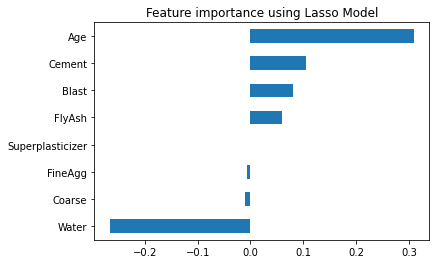

In [89]:
ml.fl_lassoCV(X,y)

### 2- Filter Method (Correlation Visualize)

In [103]:
ml.fl_corl(df4)

,Cement,Blast,Water,Coarse,FineAgg,Age,ConcreteStength
Cement,1.000000,-0.262896,-0.088503,-0.099806,-0.239645,-0.036319,0.476750
Blast,-0.262896,1.000000,0.113551,-0.289932,-0.295242,-0.036734,0.141472
Water,-0.088503,0.113551,1.000000,-0.207140,-0.364128,-0.022058,-0.369271
Coarse,-0.099806,-0.289932,-0.207140,1.000000,-0.180339,0.021608,-0.168613
FineAgg,-0.239645,-0.295242,-0.364128,-0.180339,1.000000,0.045706,-0.156910
Age,-0.036319,-0.036734,-0.022058,0.021608,0.045706,1.000000,0.517495
ConcreteStength,0.476750,0.141472,-0.369271,-0.168613,-0.156910,0.517495,1.000000


### 3- Wrapper Method

A wrapper method needs one machine learning algorithm and uses its performance as evaluation criteria. 

This means, you feed the features to the selected Machine Learning algorithm and based on the model performance you add/remove the features. 

This is an iterative and computationally expensive process but it is more accurate than the filter method.

***i. Backward Elimination***


In [91]:
beCols = ml.fl_bckElim(X,y)

['Cement', 'Blast', 'FlyAsh', 'Water', 'Superplasticizer', 'Age']


***ii. RFE (Recursive Feature Elimination)***

In [92]:
rfeCols = ml.fl_rfe(X,y)

Optimum number of features: 6
Score with 6 features: 0.751463
['Cement', 'Blast', 'FlyAsh', 'Water', 'Superplasticizer', 'Age']


***Drop Columns and Re-split dataframe in np arrays***

In [94]:
# drop colums neglected by Lasso

df_lasso = df4.drop(columns=['FlyAsh','Superplasticizer'], axis=1)

In [95]:
# drop colums neglected by Correlation Heat map

# with low impact in label
# we will decide a threshhold of 0.15
# then we will remove Blast and FlyAsh
# Also we will drop Water and leave Superplasticizer as they are 
#   collerated with each other, and Superplasticizer is higher with the label

df_corl = df4.drop(columns=[ 'Blast','FlyAsh', 'Coarse','FineAgg'], axis=1)

In [96]:
# drop colums neglected by Backward Elimination and RFE

df_be = df4[beCols]
df_rfe = df4[rfeCols]

In [97]:
X =df_lasso.iloc[:,:-1]
y=df_lasso.iloc[:,-1]
features_matrix= X.values
label=y.values

### >>>>>>>> Note

1. Filter method is less accurate. It is great while doing EDA, it can also be used for checking multi co-linearity in data.

2. Wrapper and Embedded methods give more accurate results but as they are computationally expensive,

    these method are suited when you have lesser features (~20).

# 3. Building the Model

**Best Regressor**

define the main function for applying all regressions and choose the highest error value, also it will draw the regressors prediction graphs


Parameters:

    1. X Values
    2. y Values
    3. random seed

In [22]:
def bestRegressor(X,y,xr=42):
    
    # 0- Split
    from sklearn.model_selection import train_test_split
    X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = xr, shuffle = True )

    # 0.1- Scale features
    X_train,X_test = ml.dp_scaleFeatures(X_train,X_test)

    # 1- Linear Regression
    linear_pred  = ml.mod_LinearReg( X_train, X_test, y_train, y_test)

    # 2- Find Ridge & Lasso
    ridge_pred = ml.mod_alphaRegulariz(X_train, X_test, y_train, y_test, 'Ridge')
    lasso_pred = ml.mod_alphaRegulariz(X_train, X_test, y_train, y_test, 'Lasso')

    # 3- Calculate Scores

    linear_error_r2, linear_error_mae, linear_error_mse = ml.mod_scores(y_test,linear_pred)
    ridge_error_r2, ridge_error_mae, ridge_error_mse = ml.mod_scores(y_test,ridge_pred)
    lasso_error_r2, lasso_error_mae, lasso_error_mse = ml.mod_scores(y_test,lasso_pred)

    # 4- Print all scores
    print('Linear regression: \n', 
    'R-Squared: ',linear_error_r2,'\n', 
    'MAE: ', linear_error_mae,'\n', 
    'MSE: ', linear_error_mse,'\n=================\n')

    print('Ridge regression: \n', 
    'R-Squared: ',ridge_error_r2,'\n', 
    'MAE: ', ridge_error_mae,'\n', 
    'MSE: ', ridge_error_mse,'\n=================\n')

    print('Lasso regression: \n', 
    'R-Squared: ',lasso_error_r2,'\n', 
    'MAE: ', lasso_error_mae,'\n', 
    'MSE: ', lasso_error_mse,'\n=================\n')

    # 4- Select the best r2 error
    r2_errors = {linear_error_r2:"linear",ridge_error_r2:"ridge",lasso_error_r2:"lasso"}
    preds = {"linear":linear_pred,"ridge":ridge_pred,"lasso":lasso_pred}

    bestPred = preds.get(r2_errors.get(max(r2_errors)))
    
    print('Best regression: ', r2_errors.get(max(r2_errors)), ' -- with error r2: ', max(r2_errors))
    print('\n')

    # 4- Draw Graphs

    # Linear 
    ml.mod_drawPred(y_test, linear_pred, 'Linear Regression %s' % ( round(linear_error_r2 *100,2) ))

    # Ridge 
    ml.mod_drawPred(y_test, ridge_pred, 'Ridge Regression %s' % ( round(ridge_error_r2 *100,2) ))

    # Lasso 
    ml.mod_drawPred(y_test, lasso_pred, 'Lasso Regression %s' % ( round(lasso_error_r2 *100,2) ))

    return max(r2_errors)

**Train and test the model**

Linear regression: 
 R-Squared:  0.8310836630408523 
 MAE:  5.520401204120564 
 MSE:  51.568792565189725 

Ridge regression: 
 R-Squared:  0.8310836630408523 
 MAE:  5.520401204120564 
 MSE:  51.56879256518974 

Lasso regression: 
 R-Squared:  0.8310836630408519 
 MAE:  5.520401204120576 
 MSE:  51.56879256518987 

Best regression:  ridge  -- with error r2:  0.8310836630408523




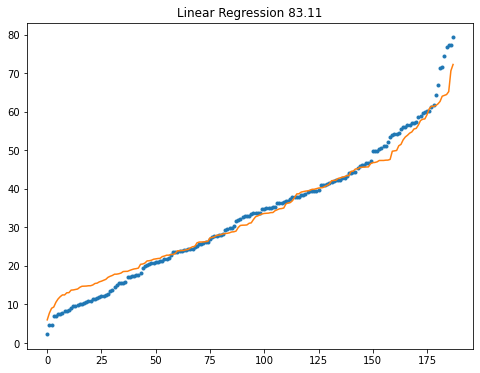

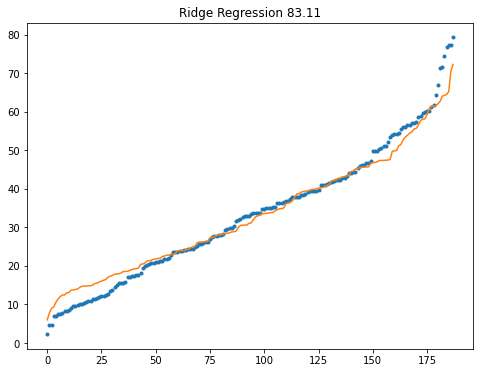

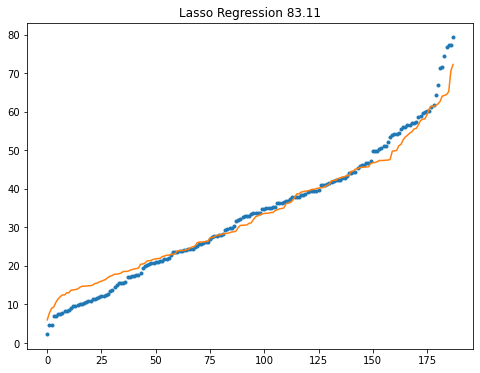

In [101]:
bestPred = bestRegressor(features_matrix,label,30)